<a href="https://colab.research.google.com/github/Thicabien2004/Plant-project/blob/main/Phylogenetic_signal_(for_flowering_time_%E2%80%93%C2%A0sum_of_months)_Pagel_Lambda_and_Blomberg_K_test_(R_script).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%R
install.packages("phytools")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘iterators’, ‘fastmatch’, ‘igraph’, ‘quadprog’, ‘ape’, ‘maps’, ‘clusterGeneration’, ‘coda’, ‘combinat’, ‘DEoptim’, ‘doParallel’, ‘expm’, ‘foreach’, ‘mnormt’, ‘numDeriv’, ‘optimParallel’, ‘phangorn’, ‘scatterplot3d’

trying URL 'https://cran.rstudio.com/src/contrib/iterators_1.0.14.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/fastmatch_1.1-6.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/igraph_2.1.4.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/quadprog_1.5-8.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/ape_5.8-1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/maps_3.4.3.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/clusterGeneration_1.3.8.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/coda_0.19-4.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/combinat_0.0-8.tar.gz'
trying URL 'https://c

In [ ]:
%%R
library(phytools)
library(ape)
library(readxl)

Loading required package: ape
Loading required package: maps


In [ ]:
%%R
# Load your tree
tree <-read.tree("/content/drive/MyDrive/PLANT RESEARCH/datasets/Copy of Rham.69t.WAonly.tree")
print(list(tree$tip.label))

[[1]]
 [1] "Trymalium_angustifolium"    "Trymalium_urceolare"       
 [3] "Trymalium_ledifolium"       "Trymalium_monospermum"     
 [5] "Trymalium_litorale"         "Trymalium_daphnifolium"    
 [7] "Trymalium_myrtillus"        "Trymalium_elachophyllum"   
 [9] "Polianthion_wichurae"       "Polianthion_biloculare"    
[11] "Polianthion_collinum"       "Stenanthemum_notiale"      
[13] "Stenanthemum_intricatum"    "Stenanthemum_nanum"        
[15] "Stenanthemum_coronatum"     "Stenanthemum_limitatum"    
[17] "Stenanthemum_emarginatum"   "Stenanthemum_tridentatum"  
[19] "Stenanthemum_reissekii"     "Stenanthemum_complicatum"  
[21] "Stenanthemum_pumilum"       "Stenanthemum_humile"       
[23] "Stenanthemum_sublineare"    "Stenanthemum_mediale"      
[25] "Stenanthemum_petraeum"      "Stenanthemum_pomaderroides"
[27] "Stenanthemum_stipulosum"    "Stenanthemum_newbeyi"      
[29] "Cryptandra_pungens"         "Cryptandra_inconspicua"    
[31] "Cryptandra_mutila"          "Cryptandra_gla

In [ ]:
%%R
print(tree)


Phylogenetic tree with 69 tips and 67 internal nodes.

Tip labels:
  Trymalium_angustifolium, Trymalium_urceolare, Trymalium_ledifolium, Trymalium_monospermum, Trymalium_litorale, Trymalium_daphnifolium, ...

Rooted; includes branch length(s).


In [ ]:
%%R
tip_label_list <- as.list(tree$tip.label)
print(tip_label_list)

[[1]]
[1] "Trymalium_angustifolium"

[[2]]
[1] "Trymalium_urceolare"

[[3]]
[1] "Trymalium_ledifolium"

[[4]]
[1] "Trymalium_monospermum"

[[5]]
[1] "Trymalium_litorale"

[[6]]
[1] "Trymalium_daphnifolium"

[[7]]
[1] "Trymalium_myrtillus"

[[8]]
[1] "Trymalium_elachophyllum"

[[9]]
[1] "Polianthion_wichurae"

[[10]]
[1] "Polianthion_biloculare"

[[11]]
[1] "Polianthion_collinum"

[[12]]
[1] "Stenanthemum_notiale"

[[13]]
[1] "Stenanthemum_intricatum"

[[14]]
[1] "Stenanthemum_nanum"

[[15]]
[1] "Stenanthemum_coronatum"

[[16]]
[1] "Stenanthemum_limitatum"

[[17]]
[1] "Stenanthemum_emarginatum"

[[18]]
[1] "Stenanthemum_tridentatum"

[[19]]
[1] "Stenanthemum_reissekii"

[[20]]
[1] "Stenanthemum_complicatum"

[[21]]
[1] "Stenanthemum_pumilum"

[[22]]
[1] "Stenanthemum_humile"

[[23]]
[1] "Stenanthemum_sublineare"

[[24]]
[1] "Stenanthemum_mediale"

[[25]]
[1] "Stenanthemum_petraeum"

[[26]]
[1] "Stenanthemum_pomaderroides"

[[27]]
[1] "Stenanthemum_stipulosum"

[[28]]
[1] "Stenanthemum_n

In [ ]:
%%R
dd <- read.csv("/content/drive/MyDrive/PLANT RESEARCH/datasets/Copy of Rham-69t.subset.csv")
colnames(dd)

 [1] "species"             "X."                  "X.."                
 [4] "WA"                  "Age"                 "Ploidy"             
 [7] "log.length"          "log.area"            "log.turn"           
[10] "log.netd"            "log.spec"            "ORDER"              
[13] "species.1"           "Rare..Yes.No."       "EPBC"               
[16] "WA.1"                "January"             "February"           
[19] "March"               "April"               "May"                
[22] "June"                "July"                "August"             
[25] "September"           "October"             "November"           
[28] "December"            "genus"               "Sum.of.Months"      
[31] "bio15"               "bio12"               "bio7"               
[34] "bio4"                "AGE..Ma."            "ploidy"             
[37] "Length..km."         "Area..km2."          "speciation"         
[40] "Cluster"             "Category_Sum_Months"


In [ ]:
%%R
#REMOVE missing values from the trait we're testing
dd <- dd[!is.na(dd$Sum.of.Months), ]


In [ ]:
%%R
# which are mismatched?
tree_not_dd <- tree$tip.label[which(!tree$tip.label %in% dd$species)]
dd_not_tree <- dd$species[which(!dd$species %in% tree$tip.label)]

# drop mismatched
dd <- dd[which(!dd$species %in% dd_not_tree ),]
tree <- drop.tip(tree, tree_not_dd)

In [ ]:
%%R
# double check they match
all(dd$species %in% tree$tip.label)


[1] TRUE


In [ ]:
%%R
all(tree$tip.label %in% dd$species)

[1] TRUE


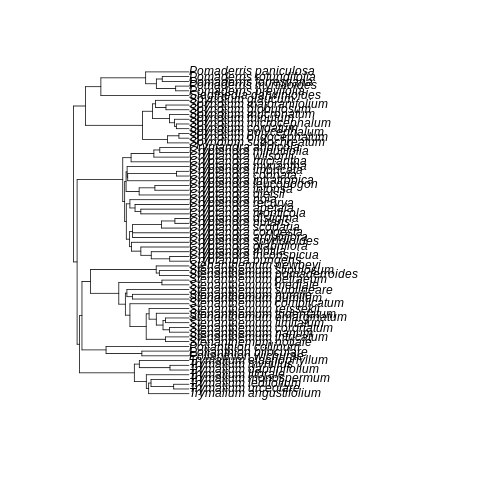

In [ ]:
%%R
plot(tree)

In [ ]:
%%R
Ntip(tree)

[1] 69


In [ ]:
%%R
colnames(dd)

 [1] "species"             "X."                  "X.."                
 [4] "WA"                  "Age"                 "Ploidy"             
 [7] "log.length"          "log.area"            "log.turn"           
[10] "log.netd"            "log.spec"            "ORDER"              
[13] "species.1"           "Rare..Yes.No."       "EPBC"               
[16] "WA.1"                "January"             "February"           
[19] "March"               "April"               "May"                
[22] "June"                "July"                "August"             
[25] "September"           "October"             "November"           
[28] "December"            "genus"               "Sum.of.Months"      
[31] "bio15"               "bio12"               "bio7"               
[34] "bio4"                "AGE..Ma."            "ploidy"             
[37] "Length..km."         "Area..km2."          "speciation"         
[40] "Cluster"             "Category_Sum_Months"


In [ ]:
%%R
# Reorder dd to match the order of tree$tip.label
dd <- dd[match(tree$tip.label, dd$species), ]


In [ ]:
%%R
flowering_time <- setNames(dd$Sum.of.Months, dd$species)


In [ ]:
%%R
K_result <- phylosig(tree, flowering_time, method = "K", test = TRUE)
print(K_result)



Phylogenetic signal K : 0.450479 
P-value (based on 1000 randomizations) : 0.074 



In [ ]:
%%R
lambda_result <- phylosig(tree, flowering_time, method = "lambda", test = TRUE)
print(lambda_result)



Phylogenetic signal lambda : 0.205681 
logL(lambda) : -155.942 
LR(lambda=0) : 2.68671 
P-value (based on LR test) : 0.101188 

